In [1]:
import pandas as pd
import numpy as np
import gensim
import re
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from IPython.display import display, Markdown
import datasets


The data is separated by year. I will be starting from 2000 and I removed the unknown sub-folder within the data folder Each of the folders will be converted to dataframes that correspond to a specific year with rows that represent each of the files.

Each of the files in the folders will be first go through a content check (if the document is too short (empty) or too long (over 1000 lines) it will be discarded).

If the file passes the length check it will then be shortened to remove the header and have its contents added to the dataframe.

This dataframe will then be added to a dictionary that maps years to the corresponding dataframe. 

In [2]:
def remove_files(text):
    count = len(text.split(" "))
    if  count < 1000 or count > 100000:
        return True
    return False


In [3]:
def create_dictionary():
    dataset = datasets.load_dataset("siavava/ai-tech-articles")
    df = dataset["train"].to_pandas()  # there's only the 'train' split because HF requires it.

    # split df by year
    years = df["year"].unique()
    dfs = {}
    for year in sorted(years):
        year_df = df[df["year"] == year]
        year_df.apply(lambda row: np.nan if remove_files(row['text']) else row['text'], axis = 1)
        year_df = year_df.dropna(subset=['text'])
        year_df = year_df.sample(n=min(100, len(year_df)))
        dfs[year] = year_df 

    return dfs


In [4]:
year_dictionary = create_dictionary()


In [5]:
for year in year_dictionary:
    display(Markdown(f"### Year: {year}"))
    display(Markdown(f"Number of articles: {len(year_dictionary[year])}"))
    display(year_dictionary[year].head(3))
    display(Markdown("---"))


### Year: 2000

Number of articles: 31

,id,year,title,url,text
8110,8158,2000,"""How to submit a guest post | VentureBeat""","""https://venturebeat.com/2020/01/16/mojo-visio...","""Artificial Intelligence View All AI, ML and D..."
9101,9149,2000,"""How to submit a guest post | VentureBeat""","""https://venturebeat.com/2019/12/10/why-you-ca...","""Artificial Intelligence View All AI, ML and D..."
8748,8796,2000,"""How to submit a guest post | VentureBeat""","""https://venturebeat.com/2021/01/12/google-tra...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2001

Number of articles: 8

,id,year,title,url,text
9549,9599,2001,"""Matt Marshall, Author at VentureBeat""","""https://venturebeat.com/author/matt-marshall""","""Artificial Intelligence View All AI, ML and D..."
6990,7038,2001,"""S | Keywords | The Guardian""","""https://www.theguardian.com/index/subjects/s""","""Account overview Billing Profile Emails & mar..."
11781,11848,2001,"""Ouch | WIRED""","""https://www.wired.com/2001/06/wired-index-5""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2002

Number of articles: 15

,id,year,title,url,text
13215,13282,2002,"""The Nanotube Computer | MIT Technology Review""","""https://www.technologyreview.com/2002/03/01/2...","""Featured Topics Newsletters Events Podcasts F..."
13625,13692,2002,"""The industrial metaverse: A game-changer for ...","""https://www.technologyreview.com/2022/12/05/1...","""In association with Nokia In association with..."
11341,11407,2002,"""In Gold We Trust | WIRED""","""https://www.wired.com/wired/archive/10.01/ego...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2003

Number of articles: 1

,id,year,title,url,text
884,897,2003,"""Microsoft Sued for Weak Security | WIRED""","""https://www.wired.com/2003/10/microsoft-sued-...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2004

Number of articles: 9

,id,year,title,url,text
10630,10694,2004,"""Google’s AI chatbot Bard makes factual error ...","""https://www.theverge.com/2023/2/8/23590864/go...","""The Verge homepage The Verge homepage The Ver..."
13302,13369,2004,"""They've Got Your Number … | WIRED""","""https://www.wired.com/2004/12/phreakers""","""Open Navigation Menu To revist this article, ..."
535,548,2004,"""Craig Venter's Epic Voyage to Redefine the Or...","""https://www.wired.com/2004/08/venter""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2005

Number of articles: 5

,id,year,title,url,text
1897,1910,2005,"""Implanting Hope | MIT Technology Review""","""https://www.technologyreview.com/s/403761/imp...","""Featured Topics Newsletters Events Podcasts F..."
13209,13276,2005,"""The Hundred Dollar Man | MIT Technology Review""","""https://www.technologyreview.com/2005/10/13/2...","""Featured Topics Newsletters Events Podcasts F..."
10935,11000,2005,"""Rocket Man | WIRED""","""https://www.wired.com/2005/01/branson""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2006

Number of articles: 14

,id,year,title,url,text
123,123,2006,"""Privacy Debacle Hall of Fame | WIRED""","""https://www.wired.com/2006/08/privacy-debacle...","""Open Navigation Menu To revist this article, ..."
7544,7592,2006,"""Fighting Fantasy Gamebooks Are Still Going St...","""https://www.wired.com/2023/08/geeks-guide-gam...","""Visually Open Nav.\nGo to Wired Home Page.\nF..."
728,741,2006,"""Say Hello to Stanley | WIRED""","""https://www.wired.com/2006/01/stanley""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2007

Number of articles: 26

,id,year,title,url,text
6993,7041,2007,"""B | Keywords | The Guardian""","""https://www.theguardian.com/index/subjects/b""","""Account overview Billing Profile Emails & mar..."
8009,8057,2007,"""Software security co., Fortify, to buy Secure...","""https://venturebeat.com/2020/09/03/were-enter...","""Artificial Intelligence View All AI, ML and D..."
9078,9126,2007,"""Software security co., Fortify, to buy Secure...","""https://venturebeat.com/2019/12/10/why-you-ca...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2008

Number of articles: 17

,id,year,title,url,text
11783,11850,2008,"""Free! Why $0.00 Is the Future of Business | W...","""https://www.wired.com/2008/02/ff-free""","""Open Navigation Menu To revist this article, ..."
695,708,2008,"""Is Google Making Us Stupid? - The Atlantic""","""https://www.theatlantic.com/magazine/archive/...","""Site Navigation The Atlantic Popular Latest N..."
8556,8604,2008,"""Novelist Neal Stephenson Once Again Proves He...","""https://www.wired.com/2008/08/mf-stephenson""","""Open Navigation Menu To revist this article, ..."


---

### Year: 2009

Number of articles: 20

,id,year,title,url,text
12706,12773,2009,"""Adobe acquires web analytics firm Omniture fo...","""https://venturebeat.com/2009/09/15/adobe-acqu...","""Artificial Intelligence View All AI, ML and D..."
15478,15545,2009,"""Entrepreneur Corner Roundup: The state of the...","""https://venturebeat.com/2009/11/21/entreprene...","""Artificial Intelligence View All AI, ML and D..."
11340,11406,2009,"""Bullion and Bandits: The Improbable Rise and ...","""https://www.wired.com/threatlevel/2009/06/e-g...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2010

Number of articles: 31

,id,year,title,url,text
11762,11829,2010,"""Clues Suggest Stuxnet Virus Was Built for Sub...","""https://www.wired.com/2010/11/stuxnet-clues""","""Open Navigation Menu To revist this article, ..."
9796,9848,2010,"""The Web Is Dead. Long Live the Internet | WIRED""","""https://www.wired.com/2010/08/ff-webrip""","""Open Navigation Menu To revist this article, ..."
7416,7464,2010,"""Watch Why The Average Human Couldn't Drive An...","""https://www.wired.com/video/watch/wired-news-...","""Open Navigation Menu To revisit this article,..."


---

### Year: 2011

Number of articles: 52

,id,year,title,url,text
13309,13376,2011,"""Exclusive: HP Runs VMware's Open Source 'Clou...","""https://www.wired.com/wiredenterprise/2011/11...","""Open Navigation Menu To revist this article, ..."
138,138,2011,"""What Bitcoin Is, and Why It Matters | MIT Tec...","""https://www.technologyreview.com/s/424091/wha...","""Featured Topics Newsletters Events Podcasts F..."
874,887,2011,"""Mystery Men Forge Servers For Giants of Inter...","""https://www.wired.com/wiredenterprise/2011/12...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2012

Number of articles: 100

,id,year,title,url,text
10789,10854,2012,"""Resurrect computer science – but don't kill o...","""https://www.theguardian.com/higher-education-...","""US edition US edition UK edition Australia ed..."
14690,14757,2012,"""Quantifying our lives will be a top trend of ...","""https://venturebeat.com/games/quantifying-our...","""Game Development View All Programming OS and ..."
8658,8706,2012,"""Enterprise analytics app maker Tidemark celeb...","""https://venturebeat.com/2020/06/23/researcher...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2013

Number of articles: 100

,id,year,title,url,text
13462,13529,2013,"""iOS 7 is Gorgeous, but Could Be Even Better |...","""https://www.wired.com/gadgetlab/2013/09/more-...","""Open Navigation Menu To revist this article, ..."
15979,16046,2013,"""Dirty business: Robots roam the sewer network...","""https://venturebeat.com/2013/01/22/robots-roa...","""Artificial Intelligence View All AI, ML and D..."
2082,2095,2013,"""Review: Razer Blade 14-Inch | WIRED""","""https://www.wired.com/2013/07/rader-blade-14""","""Open Navigation Menu To revisit this article,..."


---

### Year: 2014

Number of articles: 100

,id,year,title,url,text
6812,6825,2014,"""Why PSN went down: Lizard Squad's capabilitie...","""https://venturebeat.com/games/why-psn-went-do...","""Artificial Intelligence View All AI, ML and D..."
9700,9750,2014,"""October 2014 | VentureBeat""","""https://venturebeat.com/2014/10""","""Artificial Intelligence View All AI, ML and D..."
6607,6620,2014,"""After ditching Echo Nest, Rdio acquires music...","""https://venturebeat.com/media/after-ditching-...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2015

Number of articles: 100

,id,year,title,url,text
6270,6283,2015,"""Google and Asus unveil new Chrome OS form fac...","""https://venturebeat.com/mobile/google-and-asu...","""Artificial Intelligence View All AI, ML and D..."
12424,12491,2015,"""2015 | MIT Technology Review""","""https://www.technologyreview.com/innovators-u...","""Featured Topics Newsletters Events Podcasts F..."
6283,6296,2015,"""Dying Light's physics will get wacky for 24 h...","""https://venturebeat.com/games/dying-lights-ph...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2016

Number of articles: 100

,id,year,title,url,text
7828,7876,2016,"""Google's Training Its AI to Be Android's Secu...","""https://www.wired.com/2016/06/googles-android...","""Open Navigation Menu To revist this article, ..."
10760,10825,2016,"""Tech is disrupting all before it – even democ...","""https://www.theguardian.com/technology/2016/n...","""US edition US edition UK edition Australia ed..."
7929,7977,2016,"""Google's AI Takes Historic Match Against Go C...","""https://www.wired.com/2016/03/third-straight-...","""Open Navigation Menu To revist this article, ..."


---

### Year: 2017

Number of articles: 100

,id,year,title,url,text
16218,16285,2017,"""ProBeat: Wearables are gimmicks | VentureBeat""","""https://venturebeat.com/2017/07/21/probeat-we...","""Artificial Intelligence View All AI, ML and D..."
5538,5551,2017,"""Machine learning in Microsoft Word's new Edit...","""https://venturebeat.com/ai/machine-learning-i...","""Artificial Intelligence View All AI, ML and D..."
13142,13209,2017,"""Amazon Alexa tops U.S. Android and iOS app st...","""https://venturebeat.com/2017/12/26/amazon-ale...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2018

Number of articles: 100

,id,year,title,url,text
4910,4923,2018,"""Russia tries more precise technology to block...","""https://venturebeat.com/security/russia-tries...","""Artificial Intelligence View All AI, ML and D..."
4731,4744,2018,"""Twitter froze suspicious accounts linked to I...","""https://venturebeat.com/business/twitter-susp...","""Artificial Intelligence View All AI, ML and D..."
11898,11965,2018,"""Nvidia's Clara health care platform and medic...","""https://venturebeat.com/2018/11/26/nvidias-cl...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2019

Number of articles: 100

,id,year,title,url,text
12981,13048,2019,"""Facebook launches PyTorch 1.1 with TensorBoar...","""https://venturebeat.com/2019/05/01/facebook-l...","""Artificial Intelligence View All AI, ML and D..."
4613,4626,2019,"""Instagram tests making Like counts private in...","""https://venturebeat.com/social/instagram-test...","""Artificial Intelligence View All AI, ML and D..."
4683,4696,2019,"""AI will be a blessing, not a threat, to consu...","""https://venturebeat.com/ai/ai-will-be-a-bless...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2020

Number of articles: 100

,id,year,title,url,text
10908,10973,2020,"""Russia Is Learning How to Bypass Facebook's D...","""https://www.wired.com/story/russia-ira-bypass...","""Open Navigation Menu To revist this article, ..."
16064,16131,2020,"""Apple debuts 2020 iPhone SE with 4.7-inch scr...","""https://venturebeat.com/2020/04/15/apple-debu...","""Artificial Intelligence View All AI, ML and D..."
4242,4255,2020,"""WordPress 5.4 arrives with new blocks, 14% fa...","""https://venturebeat.com/business/wordpress-5-...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2021

Number of articles: 100

,id,year,title,url,text
10943,11008,2021,"""A Mystery Malware Stole 26 Million Passwords ...","""https://www.wired.com/story/mystery-malware-s...","""Open Navigation Menu To revist this article, ..."
13945,14012,2021,"""Gitpod nabs $13M for cloud-based open source ...","""https://venturebeat.com/business/gitpod-nabs-...","""Artificial Intelligence View All AI, ML and D..."
11643,11710,2021,"""Rodney Ascher: Why A Glitch in the Matrix fee...","""https://venturebeat.com/2021/03/08/rodney-asc...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2022

Number of articles: 100

,id,year,title,url,text
8106,8154,2022,"""Dev News | VentureBeat""","""https://venturebeat.com/2020/01/16/mojo-visio...","""Artificial Intelligence View All AI, ML and D..."
14843,14910,2022,"""Big data analytics expected to grow to $100B ...","""https://venturebeat.com/2022/01/02/big-data-a...","""Artificial Intelligence View All AI, ML and D..."
14633,14700,2022,"""Protecting edge data in the era of decentrali...","""https://venturebeat.com/security/protecting-e...","""Artificial Intelligence View All AI, ML and D..."


---

### Year: 2023

Number of articles: 100

,id,year,title,url,text
10755,10820,2023,"""Are chatbots coming for your job? - podcast |...","""https://www.theguardian.com/technology/audio/...","""Account overview Billing Profile Emails & mar..."
8684,8732,2023,"""Security News | VentureBeat""","""https://venturebeat.com/2019/12/21/ai-has-a-p...","""Artificial Intelligence View All AI, ML and D..."
9907,9963,2023,"""Deepfakes of Chinese influencers are livestre...","""https://www.technologyreview.com/2023/09/19/1...","""Featured Topics Newsletters Events Podcasts F..."


---

Now that we have the year dictionary we can begin the process of sentiment analysis.

The sentiment analysis model will return a sentiment number for each file. This number will then be averaged across all the files to get an average sentiment for the year.

From there we can do cosine similarity and plot sentiment for each year.

In [6]:
def add_sentiment(dataframe):

    sentiment_model = SentimentIntensityAnalyzer()
    neg_list = []
    neu_list = []
    pos_list = []
    comp_list = []


    for text in dataframe['text']:
        score_dict = sentiment_model.polarity_scores(text)
        neg_list.append(score_dict['neg'])
        neu_list.append(score_dict['neu'])
        pos_list.append(score_dict['pos'])
        comp_list.append(score_dict['compound'])
    
    dataframe['negative'] = neg_list
    dataframe['neutral'] =  neu_list
    dataframe['positive'] = pos_list
    dataframe['compound'] = comp_list


In [7]:
# text = ["CS89 is an amazing class!"]

# df = pd.DataFrame({'Text': text})

# add_sentiment(df)
# display(df)


In [8]:
for df in year_dictionary.values():
    add_sentiment(df)


In [9]:
def get_sentiment(df, sentiment_type):
    return np.mean(df[sentiment_type])


In [10]:
def get_sentiment_data(year_dict):
    
    sentiment_types = ['negative', 'neutral', 'positive', 'compound']
    sentiment_df = pd.DataFrame(columns=['year', 'negative', 'neutral', 'positive', 'compound'])
    index = 0

    for year, df in year_dict.items():
        data_list = [int(year)]

        for s_type in sentiment_types:
            data_list.append(get_sentiment(df,s_type))
            
        sentiment_df.loc[index] = data_list
        index = index + 1

    return sentiment_df


In [11]:
sentiment_data_df = get_sentiment_data(year_dictionary)
display(sentiment_data_df)


,year,negative,neutral,positive,compound
0,2000.0,0.044774,0.823226,0.131452,0.999626
1,2001.0,0.054500,0.828250,0.117250,0.749287
2,2002.0,0.054200,0.840467,0.105267,0.995560
3,2003.0,0.078000,0.807000,0.115000,0.982700
4,2004.0,0.057778,0.834667,0.107778,0.999022
5,2005.0,0.051200,0.841600,0.107200,0.999560
6,2006.0,0.069714,0.827214,0.103071,0.566200
7,2007.0,0.044423,0.828423,0.127077,0.760212
8,2008.0,0.049412,0.834353,0.116294,0.756047
9,2009.0,0.060550,0.829700,0.110000,0.608870


Plot the data with years on the x-axis and the sentiment types in different colors.

In [249]:
def plot_sentiment(df, title):
    sentiment_types = ['negative', 'neutral', 'positive', 'compound']
    colors_list = ['red', 'blue', 'gold', 'black'] 
    color_choice = 0
    
    # convert years to integers
    df['year'] = df['year'].astype(int)
    
    

    for sentiment_type in sentiment_types:
        # reset negatives to 0
        df.loc[df[sentiment_type] < 0, sentiment_type] = 0
        plt.plot(df['year'], df[sentiment_type], "o--", label=sentiment_type, color=colors_list[color_choice])
        color_choice = color_choice + 1

    # plt.figure(figsize=(12, 6))
    plt.xticks(sorted(df["year"].unique().tolist()))
    plt.legend()
    plt.title(title)
    plt.xlabel('Year')
    plt.grid()
    # set size to 15x10
    # set size
    plt.rcParams["figure.figsize"] = (15,7)
    plt.ylabel('Sentiment Score')
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.show()


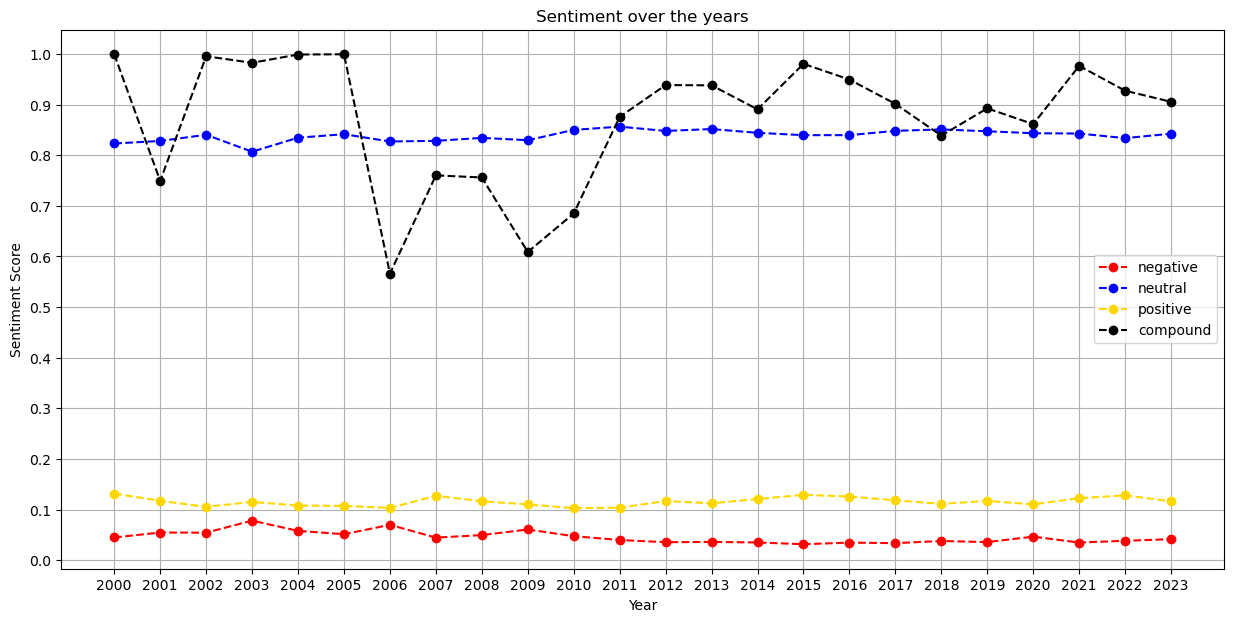

In [250]:
plot_sentiment(sentiment_data_df, "Sentiment over the years")


We can also perform topic modeling on the data. We can then analyze the sentiment within the context of the specific topic. 

I will be using the title column for each file to get an idea of the topic for A.I. Since we are only using the titles, I believe that utilizing LDA topic modeling should be sufficient. 


In [251]:
def clean_titles(text, url):
    start = url.find('https://') + len('https://')
    start = url.find('www.') + len('www.')if 'www.' in url else start

    new_url = url[start:]
    end = new_url.find(".") 
    
    name = url[start:start+end]
    text = re.sub(name, "", text.lower())

    return text


In [252]:
#print(clean_titles("This is an example","https://example.com"))


In [253]:
def get_titles(dictionary):

    all_titles = []

    for df in dictionary.values():
        titles = df[['title', 'url']].apply(lambda row: clean_titles(row['title'], row['url']), axis=1)
        titles = titles.to_list()
        all_titles.append(titles)

    return all_titles


In [254]:
titles = get_titles(year_dictionary)


In [255]:
def lemmatize(text):
    
    lemmer = WordNetLemmatizer()
    pos_set = set(['n', 'a', 'v'])

    lemmatized_text = [lemmer.lemmatize(tok, pos='n') if pos[0].lower() in pos_set else lemmer.lemmatize(tok) 
                        for sent in text for tok, pos in pos_tag(sent, tagset='universal')]
    
    return lemmatized_text


In [256]:
def process_text(text):
    text = lemmatize(text)
    vect = CountVectorizer(stop_words='english')
    features = vect.fit_transform(text)
    vocabulary = vect.get_feature_names_out()
    return features, vocabulary


In [257]:
processed_titles, vocabulary = process_text(titles)


In [258]:
def get_add_topics(features, vocabulary, dictionary):
    topic_dict ={}
    
    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42).fit(features)

    topic_num = 0
    for words in lda_model.components_:
        top_10_list = words.argsort()[:-10 - 1:-1]
        top_10 = [vocabulary[index] for index in top_10_list]
        topic_dict[topic_num] = top_10
        topic_num = topic_num + 1

    topics = lda_model.transform(features)
    topics.shape

    topic_index = -1
    for df in dictionary.values():
        title_topic = [topics[topic_index+i].argmax() for i in range(1,len(df)+1)]
        df['topic'] = title_topic
        topic_index = topic_index + len(df)

    return topic_dict


In [259]:
topics = get_add_topics(processed_titles, vocabulary, year_dictionary)


In [260]:

for topic in topics:
    display(Markdown(f"### Topic: {topic}"))
    display(Markdown(f"Top 10 words:"))
    display(", ".join(topics[topic]))
    display(Markdown("---"))


### Topic: 0

Top 10 words:

'chatbot, watch, twitter, digital, agents, privacy, apple, music, verge, decentralized'

---

### Topic: 1

Top 10 words:

'data, big, business, year, intelligence, look, google, going, gets, china'

---

### Topic: 2

Top 10 words:

'million, autonomous, cyber, 100, monday, guardian, chatbots, buys, 150, april'

---

### Topic: 3

Top 10 words:

'data, new, app, platform, mobile, enterprise, million, analytics, launches, company'

---

### Topic: 4

Top 10 words:

'ai, new, verge, microsoft, human, future, says, apple, raises, service'

---

### Topic: 5

Top 10 words:

'google, review, technology, mit, learning, deepmind, help, facebook, guardian, deep'

---

### Topic: 6

Top 10 words:

'cloud, facebook, verge, intelligence, artificial, inside, news, 10, windows, post'

---

### Topic: 7

Top 10 words:

'tech, game, metaverse, today, hear, industry, brain, world, covid, 19'

---

### Topic: 8

Top 10 words:

'open, web, raises, google, robots, source, developers, market, codex, billion'

---

### Topic: 9

Top 10 words:

'security, software, new, real, yorker, time, buy, secure, games, health'

---

In [261]:
#print(year_dictionary[2023]['topic'].values)


Now we can create dataframes grouped by topic and map the sentiment.

In [262]:
def create_topics_dict(dictionary):
    
    new_dict = {}
    
    for topic_num in range(10):
        topic_df = pd.DataFrame()

        for df in dictionary.values():
            temp_df = df[df['topic'] == topic_num]
            topic_df = pd.concat([topic_df, temp_df])
        
        new_dict[topic_num] = topic_df
    
    return new_dict


In [263]:
topic_dictionary = create_topics_dict(year_dictionary)

for topic in topic_dictionary:
    display(Markdown(f"### Topic: {topic}"))
    display(Markdown(f"Number of articles: {len(topic_dictionary[topic])}"))
    display(topic_dictionary[topic].head(3))
    display(Markdown("---"))


### Topic: 0

Number of articles: 105

,id,year,title,url,text,negative,neutral,positive,compound,topic
7379,7427,2002,"""Innovation - Vox""","""https://www.vox.com/innovation""","""Vox homepage Give Give Newsletters Newsletter...",0.046,0.831,0.123,0.9971,0
10630,10694,2004,"""Google’s AI chatbot Bard makes factual error ...","""https://www.theverge.com/2023/2/8/23590864/go...","""The Verge homepage The Verge homepage The Ver...",0.052,0.822,0.127,0.9970,0
123,123,2006,"""Privacy Debacle Hall of Fame | WIRED""","""https://www.wired.com/2006/08/privacy-debacle...","""Open Navigation Menu To revist this article, ...",0.111,0.802,0.087,-0.9968,0


---

### Topic: 1

Number of articles: 133

,id,year,title,url,text,negative,neutral,positive,compound,topic
249,259,2000,"""The Coming Air Age - The Atlantic""","""https://www.theatlantic.com/magazine/archive/...","""Site Navigation The Atlantic Popular Latest N...",0.056,0.852,0.092,0.9995,1
7902,7950,2000,"""The Hot Seat | WIRED""","""https://www.wired.com/2000/07/chairs""","""Open Navigation Menu To revist this article, ...",0.056,0.803,0.140,0.9999,1
11225,11291,2001,"""2001's 30-Year Odyssey | WIRED""","""https://www.wired.com//culture/lifestyle/news...","""Open Navigation Menu To revist this article, ...",0.028,0.872,0.100,0.9954,1


---

### Topic: 2

Number of articles: 72

,id,year,title,url,text,negative,neutral,positive,compound,topic
6991,7039,2000,"""H | Keywords | The Guardian""","""https://www.theguardian.com/index/subjects/h""","""Account overview Billing Profile Emails & mar...",0.042,0.829,0.129,0.9998,2
6990,7038,2001,"""S | Keywords | The Guardian""","""https://www.theguardian.com/index/subjects/s""","""Account overview Billing Profile Emails & mar...",0.044,0.786,0.170,1.0000,2
2055,2068,2001,"""The 11 Best Sci-Fi Movies You Can Stream Righ...","""https://www.wired.com/2017/03/best-sci-fi-str...","""Open Navigation Menu To revist this article, ...",0.067,0.770,0.163,0.9995,2


---

### Topic: 3

Number of articles: 164

,id,year,title,url,text,negative,neutral,positive,compound,topic
7443,7491,2000,"""Watch How This Guy Became The Best Rock Skipp...","""https://www.wired.com/video/watch/obsessed-ho...","""Open Navigation Menu To revisit this article,...",0.032,0.846,0.122,0.9997,3
6959,7007,2002,"""Stalking the American Lobster - The Atlantic""","""https://www.theatlantic.com/magazine/archive/...","""Site Navigation The Atlantic Popular Latest N...",0.056,0.865,0.079,0.9997,3
408,421,2004,"""What is biohacking? The new “science” of opti...","""https://www.vox.com/future-perfect/2019/6/25/...","""We have a request Vox's journalism is free, b...",0.072,0.814,0.114,0.9997,3


---

### Topic: 4

Number of articles: 229

,id,year,title,url,text,negative,neutral,positive,compound,topic
424,437,2000,"""AI jobs: No one knows what a head of AI does,...","""https://www.vox.com/technology/2023/7/19/2379...","""Vox homepage Give Give Newsletters Newsletter...",0.070,0.814,0.116,0.9991,4
345,358,2000,"""Shelf Improvement book subscriptions""","""https://www.theguardian.com/shelf-improvement""","""Toggle menu Visit the Guardian Compare Wish L...",0.053,0.861,0.086,0.9998,4
782,795,2000,"""Why the Future Doesn't Need Us | WIRED""","""https://www.wired.com/2000/04/joy-2""","""Open Navigation Menu To revist this article, ...",0.114,0.755,0.130,0.9996,4


---

### Topic: 5

Number of articles: 247

,id,year,title,url,text,negative,neutral,positive,compound,topic
13214,13281,2000,"""Molecular Computing | MIT Technology Review""","""https://www.technologyreview.com/2000/05/01/1...","""Featured Topics Newsletters Events Podcasts F...",0.046,0.878,0.076,0.9982,5
9549,9599,2001,"""Matt Marshall, Author at VentureBeat""","""https://venturebeat.com/author/matt-marshall""","""Artificial Intelligence View All AI, ML and D...",0.029,0.868,0.103,0.9935,5
11781,11848,2001,"""Ouch | WIRED""","""https://www.wired.com/2001/06/wired-index-5""","""Open Navigation Menu To revist this article, ...",0.060,0.836,0.104,1.0000,5


---

### Topic: 6

Number of articles: 178

,id,year,title,url,text,negative,neutral,positive,compound,topic
8110,8158,2000,"""How to submit a guest post | VentureBeat""","""https://venturebeat.com/2020/01/16/mojo-visio...","""Artificial Intelligence View All AI, ML and D...",0.024,0.821,0.154,0.9997,6
9101,9149,2000,"""How to submit a guest post | VentureBeat""","""https://venturebeat.com/2019/12/10/why-you-ca...","""Artificial Intelligence View All AI, ML and D...",0.024,0.821,0.154,0.9997,6
8748,8796,2000,"""How to submit a guest post | VentureBeat""","""https://venturebeat.com/2021/01/12/google-tra...","""Artificial Intelligence View All AI, ML and D...",0.024,0.821,0.154,0.9997,6


---

### Topic: 7

Number of articles: 98

,id,year,title,url,text,negative,neutral,positive,compound,topic
462,475,2000,"""Microsoft’s HoloLens 2: a $3500 mixed reality...","""https://www.theverge.com/2019/2/24/18235460/m...","""The Verge homepage The Verge homepage The Ver...",0.028,0.875,0.097,0.9999,7
278,291,2000,"""The Computers of Tomorrow - The Atlantic""","""https://www.theatlantic.com/magazine/archive/...","""Site Navigation The Atlantic Popular Latest N...",0.039,0.851,0.110,0.9998,7
13625,13692,2002,"""The industrial metaverse: A game-changer for ...","""https://www.technologyreview.com/2022/12/05/1...","""In association with Nokia In association with...",0.015,0.883,0.102,0.9992,7


---

### Topic: 8

Number of articles: 108

,id,year,title,url,text,negative,neutral,positive,compound,topic
2043,2056,2000,"""O, Engineers! | WIRED""","""https://www.wired.com/2000/12/soul""","""Open Navigation Menu To revist this article, ...",0.070,0.828,0.101,0.9998,8
11831,11898,2001,"""Happy Birthday, Hal | WIRED""","""https://www.wired.com/1997/01/ffhal""","""Open Navigation Menu To revist this article, ...",0.052,0.847,0.101,0.9998,8
7378,7426,2002,"""Vox Archives - Technology - Page 1""","""https://www.vox.com/technology/archives""","""Vox homepage Give Give Newsletters Newsletter...",0.081,0.796,0.122,0.9882,8


---

### Topic: 9

Number of articles: 95

,id,year,title,url,text,negative,neutral,positive,compound,topic
8009,8057,2007,"""Software security co., Fortify, to buy Secure...","""https://venturebeat.com/2020/09/03/were-enter...","""Artificial Intelligence View All AI, ML and D...",0.026,0.83,0.144,0.9873,9
9078,9126,2007,"""Software security co., Fortify, to buy Secure...","""https://venturebeat.com/2019/12/10/why-you-ca...","""Artificial Intelligence View All AI, ML and D...",0.026,0.83,0.144,0.9873,9
8201,8249,2007,"""Software security co., Fortify, to buy Secure...","""https://venturebeat.com/2021/11/07/12-factors...","""Artificial Intelligence View All AI, ML and D...",0.026,0.83,0.144,0.9873,9


---

,year,negative,neutral,positive,compound
0,2002,0.046000,0.831000,0.123000,0.997100
1,2004,0.052000,0.822000,0.127000,0.997000
2,2006,0.111000,0.802000,0.087000,-0.996800
3,2007,0.120000,0.812000,0.068000,-0.999900
4,2008,0.050667,0.823333,0.126333,0.416933
5,2009,0.023000,0.855000,0.122000,0.998800
6,2010,0.048333,0.847333,0.104333,0.998133
7,2011,0.043000,0.837000,0.121000,0.999200
8,2012,0.064000,0.839200,0.096400,0.585840
9,2013,0.043600,0.835200,0.121200,0.998580


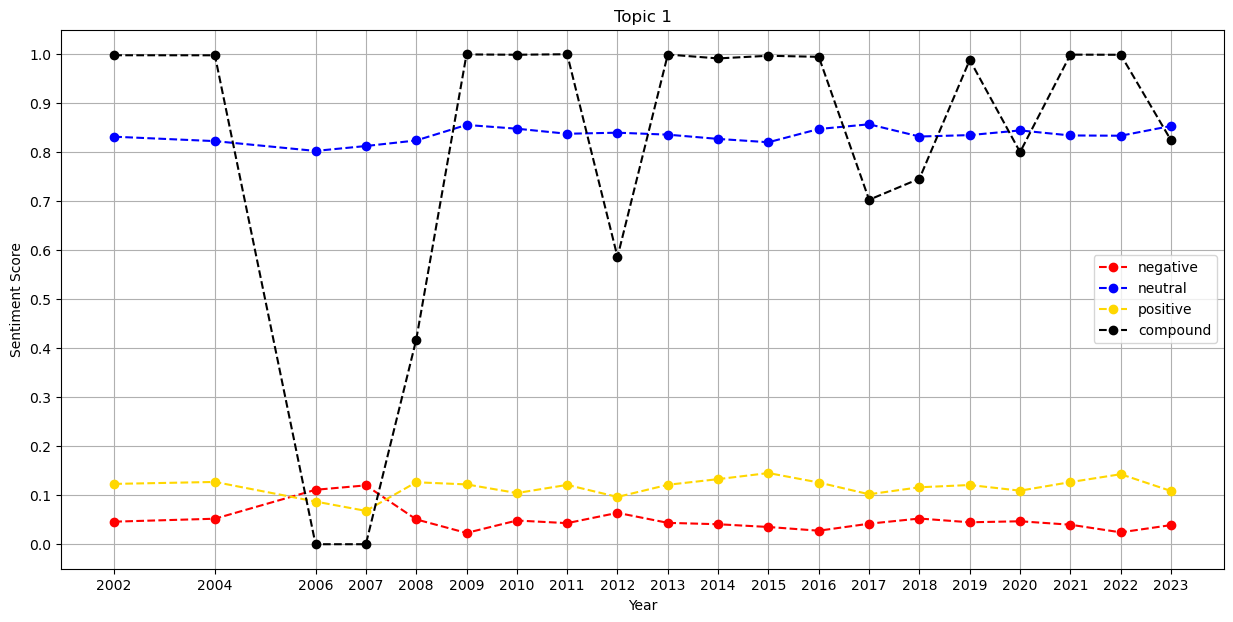

,year,negative,neutral,positive,compound
0,2000,0.056000,0.827500,0.116000,0.999700
1,2001,0.028000,0.872000,0.100000,0.995400
2,2002,0.064000,0.830000,0.106000,0.999800
3,2003,0.078000,0.807000,0.115000,0.982700
4,2006,0.069000,0.826500,0.104000,0.985050
5,2008,0.040500,0.814000,0.145500,0.999950
6,2009,0.113000,0.792500,0.095000,-0.000450
7,2011,0.044500,0.860375,0.094875,0.974413
8,2012,0.043000,0.827667,0.129267,0.863500
9,2013,0.027167,0.847167,0.125333,0.997567


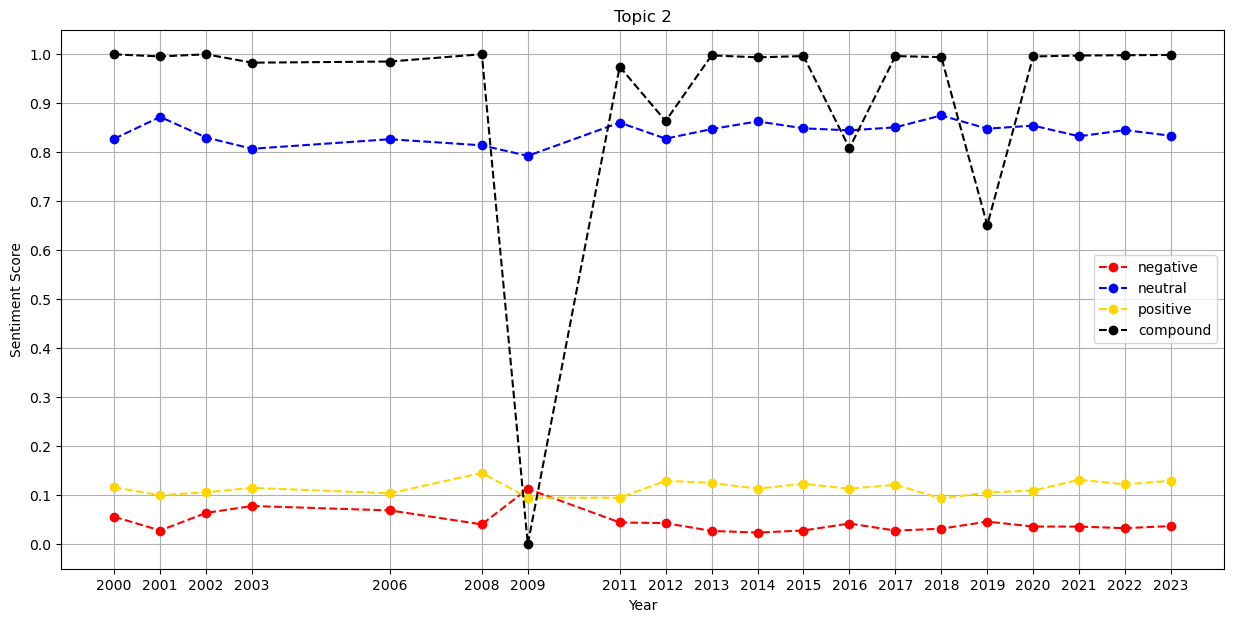

,year,negative,neutral,positive,compound
0,2000,0.042000,0.829000,0.129000,0.999800
1,2001,0.055500,0.778000,0.166500,0.999750
2,2007,0.030000,0.817333,0.152667,0.995000
3,2008,0.005000,0.874000,0.121000,0.994800
4,2010,0.016500,0.870500,0.113000,0.982700
5,2011,0.028000,0.875800,0.096600,0.990820
6,2012,0.022500,0.882500,0.095000,0.988700
7,2013,0.015500,0.854000,0.130500,0.997750
8,2014,0.049000,0.835222,0.115778,0.900889
9,2015,0.032250,0.850250,0.117750,0.989975


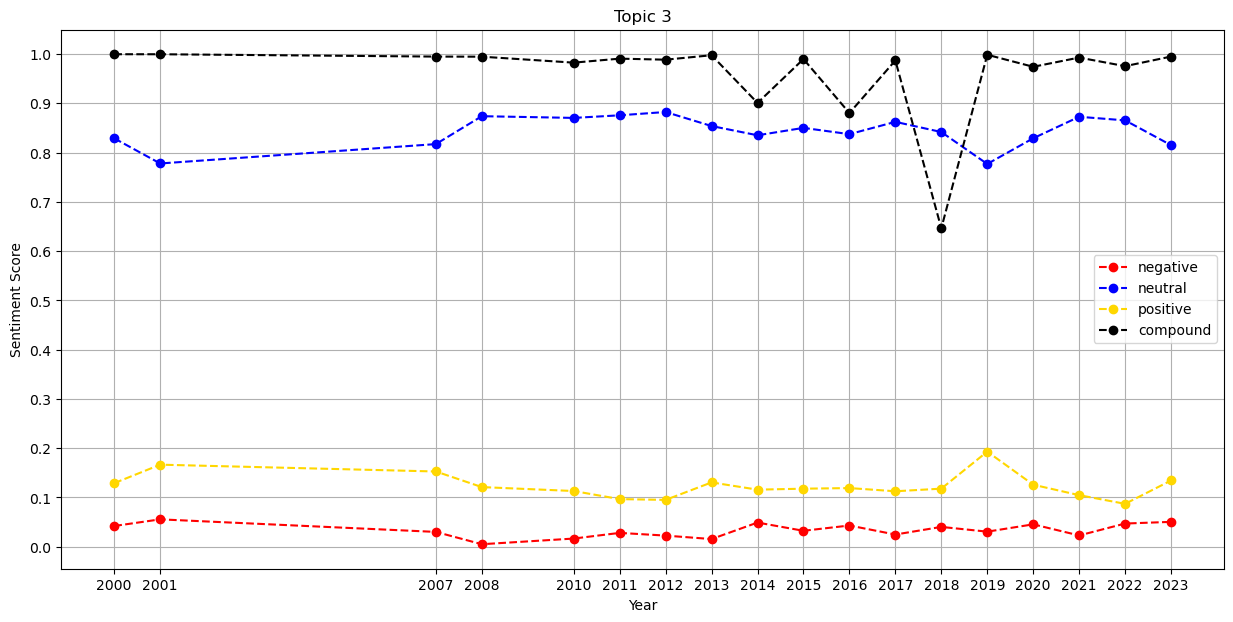

,year,negative,neutral,positive,compound
0,2000,0.032000,0.846000,0.122000,0.999700
1,2002,0.056000,0.865000,0.079000,0.999700
2,2004,0.072000,0.814000,0.114000,0.999700
3,2006,0.062000,0.831000,0.107000,0.999700
4,2007,0.044000,0.837500,0.118000,0.991050
5,2008,0.027500,0.856500,0.115500,0.998200
6,2009,0.062000,0.833000,0.105000,1.000000
7,2010,0.017500,0.878500,0.104500,0.996450
8,2011,0.022167,0.870500,0.106833,0.993033
9,2012,0.025955,0.841864,0.132636,0.916395


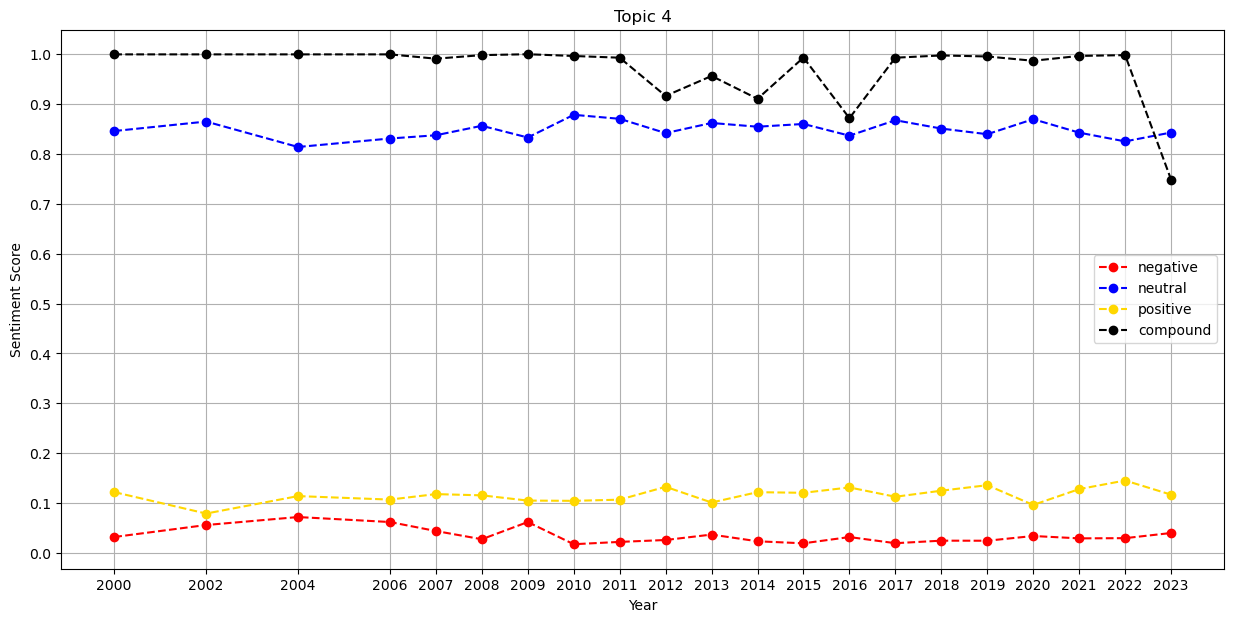

,year,negative,neutral,positive,compound
0,2000,0.080250,0.814250,0.105000,0.999525
1,2004,0.042000,0.860000,0.099000,1.000000
2,2006,0.083667,0.818667,0.097667,-0.339167
3,2007,0.169000,0.736000,0.095000,-0.998200
4,2008,0.067000,0.815500,0.117500,0.999300
5,2009,0.079000,0.814000,0.107500,0.528550
6,2010,0.032400,0.858600,0.109000,0.995920
7,2011,0.045917,0.845083,0.109167,0.822875
8,2012,0.034700,0.843600,0.121700,0.999160
9,2013,0.041000,0.847083,0.111833,0.997100


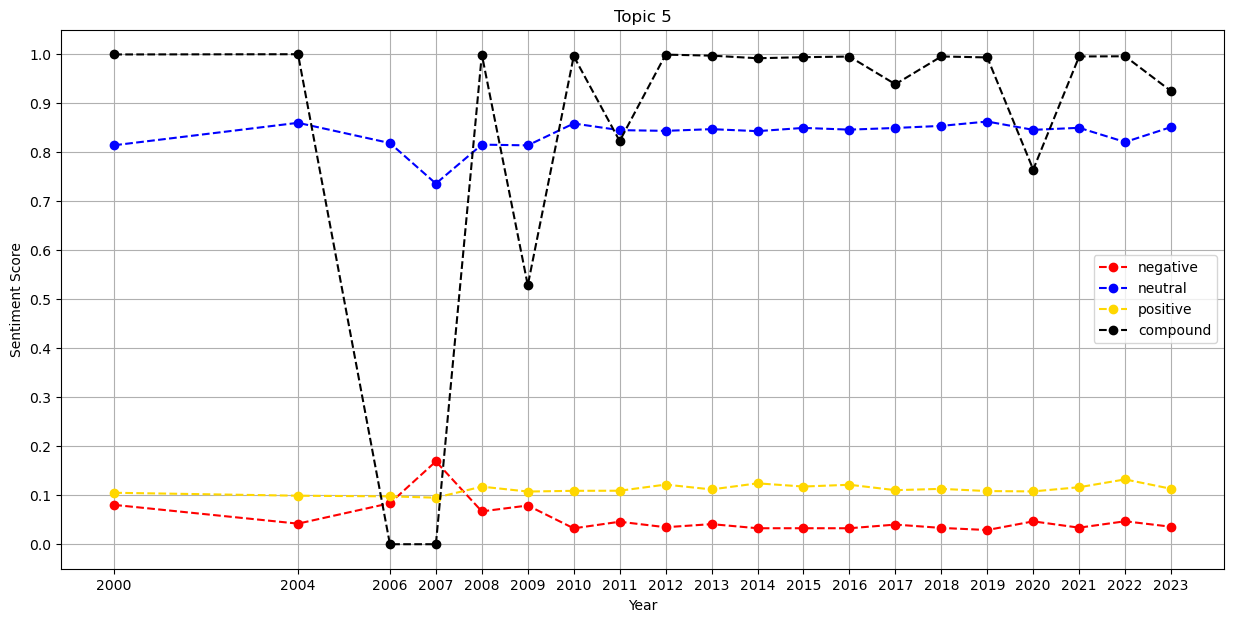

,year,negative,neutral,positive,compound
0,2000,0.046000,0.878000,0.076000,0.998200
1,2001,0.052000,0.843000,0.105000,0.997767
2,2002,0.054000,0.849000,0.096500,0.994800
3,2004,0.054400,0.839600,0.106000,0.999740
4,2005,0.052000,0.835333,0.113000,0.999467
5,2006,0.068333,0.816333,0.115667,0.994600
6,2007,0.053750,0.847750,0.098500,0.498375
7,2008,0.075000,0.849000,0.076000,-0.973200
8,2009,0.060000,0.836400,0.103800,0.283020
9,2010,0.059333,0.834000,0.106667,0.618600


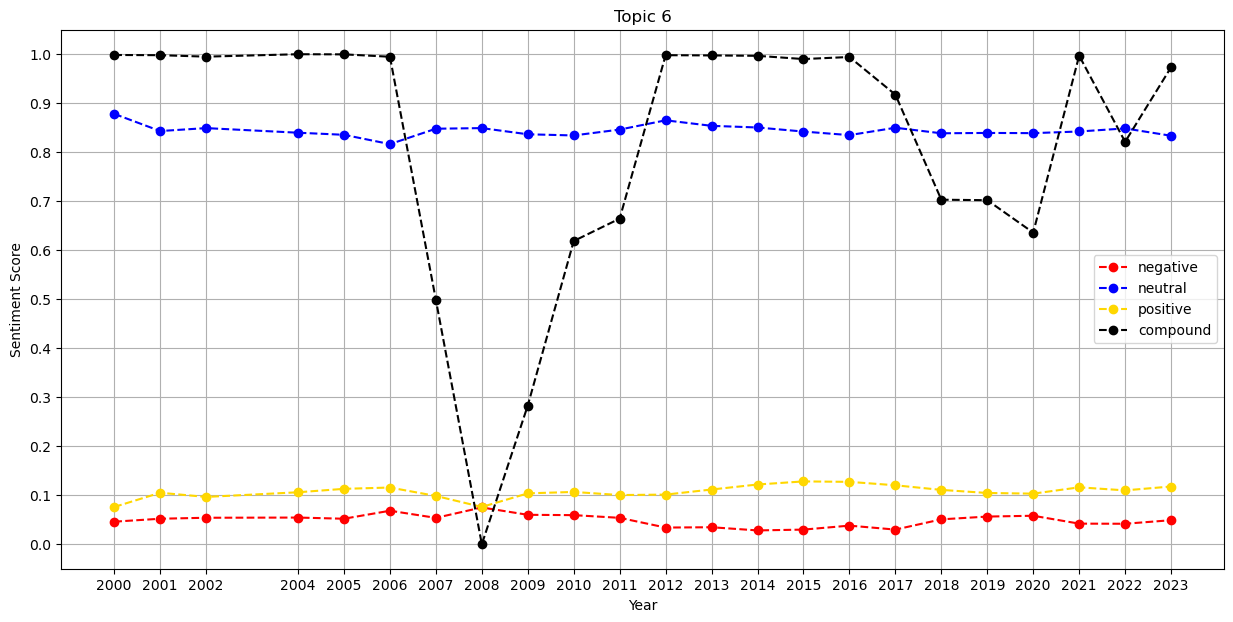

,year,negative,neutral,positive,compound
0,2000,0.036737,0.815842,0.146737,0.999668
1,2001,0.089000,0.822000,0.089000,-0.993700
2,2002,0.055000,0.819500,0.125000,0.997000
3,2005,0.053000,0.845000,0.102000,0.999800
4,2006,0.045000,0.879000,0.076000,0.994100
5,2007,0.060500,0.836500,0.102500,0.978950
6,2008,0.074000,0.786000,0.140000,0.999900
7,2009,0.046667,0.810333,0.143000,0.998733
8,2010,0.051333,0.863667,0.084667,0.322367
9,2011,0.028286,0.866143,0.105571,0.997214


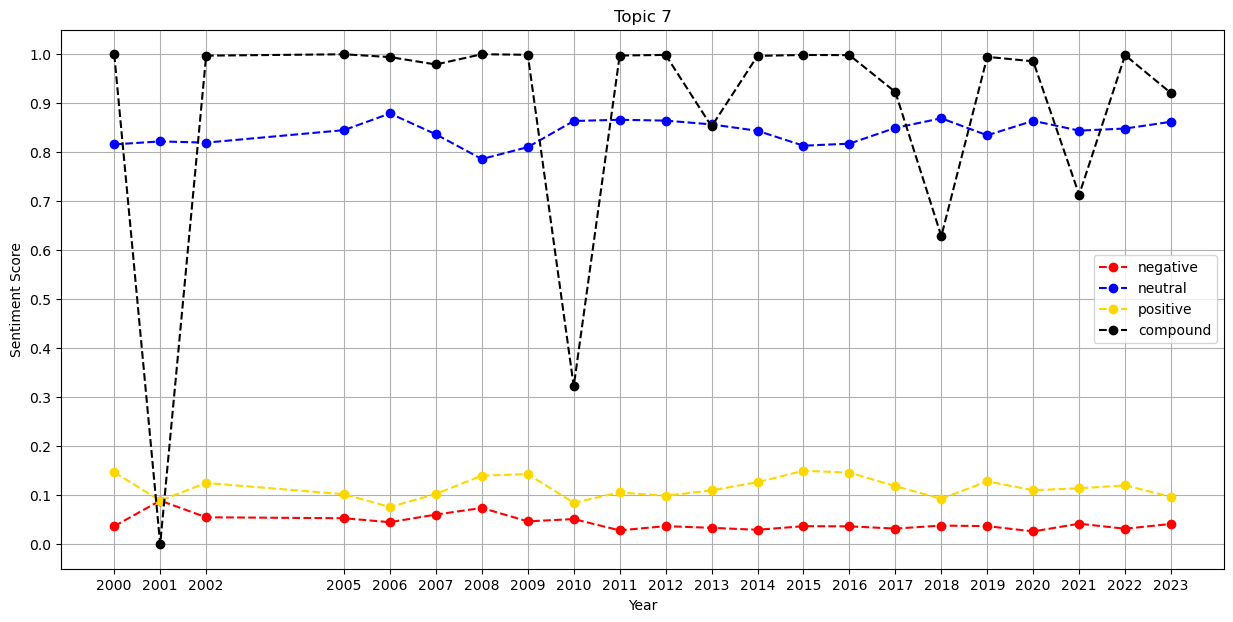

,year,negative,neutral,positive,compound
0,2000,0.033500,0.863000,0.103500,0.999850
1,2002,0.046000,0.850500,0.104000,0.999450
2,2004,0.082000,0.818000,0.100000,0.995800
3,2006,0.054667,0.837000,0.108333,0.997800
4,2007,0.040000,0.840000,0.120000,0.997500
5,2009,0.057000,0.865000,0.078000,0.659700
6,2010,0.043000,0.861500,0.095750,0.938325
7,2011,0.032000,0.898000,0.071000,0.994800
8,2012,0.036333,0.837333,0.126667,0.999167
9,2013,0.048429,0.834000,0.117571,0.712000


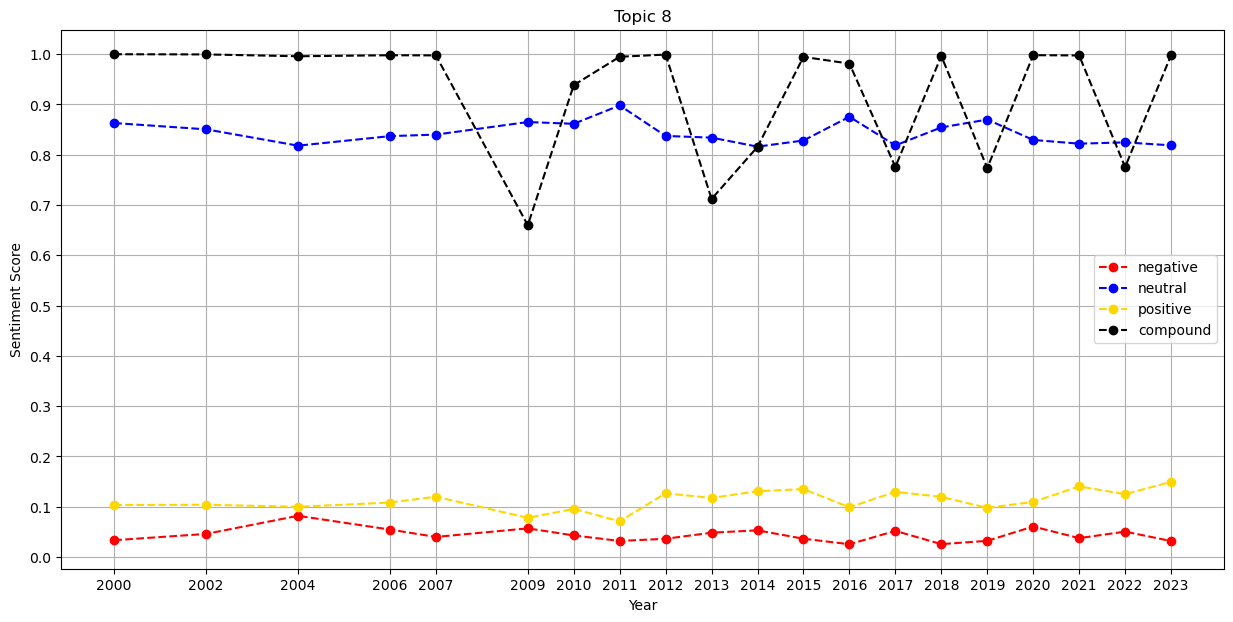

,year,negative,neutral,positive,compound
0,2000,0.070000,0.828000,0.101000,0.999800
1,2001,0.052000,0.847000,0.101000,0.999800
2,2002,0.054600,0.842600,0.102800,0.990900
3,2005,0.047000,0.857000,0.095000,0.999600
4,2008,0.040500,0.866000,0.093500,0.793100
5,2009,0.029000,0.862333,0.109000,0.998100
6,2010,0.077000,0.825667,0.097333,-0.329233
7,2011,0.025000,0.875333,0.099333,0.997233
8,2012,0.040909,0.841909,0.117000,0.994045
9,2013,0.033900,0.866000,0.099900,0.993080


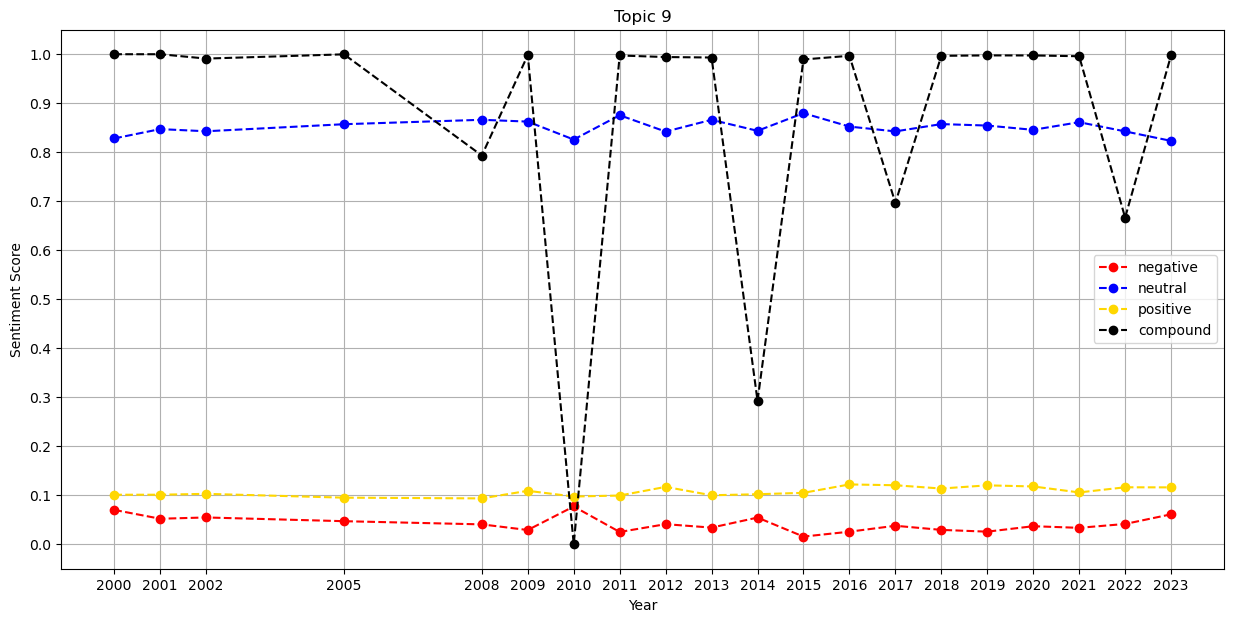

,year,negative,neutral,positive,compound
0,2007,0.026000,0.830000,0.144000,0.987300
1,2008,0.061000,0.833667,0.105667,0.999800
2,2011,0.072000,0.804333,0.123667,0.334200
3,2012,0.010667,0.873667,0.116000,0.993367
4,2013,0.034000,0.843667,0.122167,0.663333
5,2014,0.035833,0.849333,0.114833,0.990050
6,2015,0.048250,0.827750,0.124000,0.828963
7,2016,0.039600,0.831800,0.128600,0.984900
8,2017,0.043667,0.811333,0.145667,0.998600
9,2018,0.038167,0.846333,0.115167,0.722817


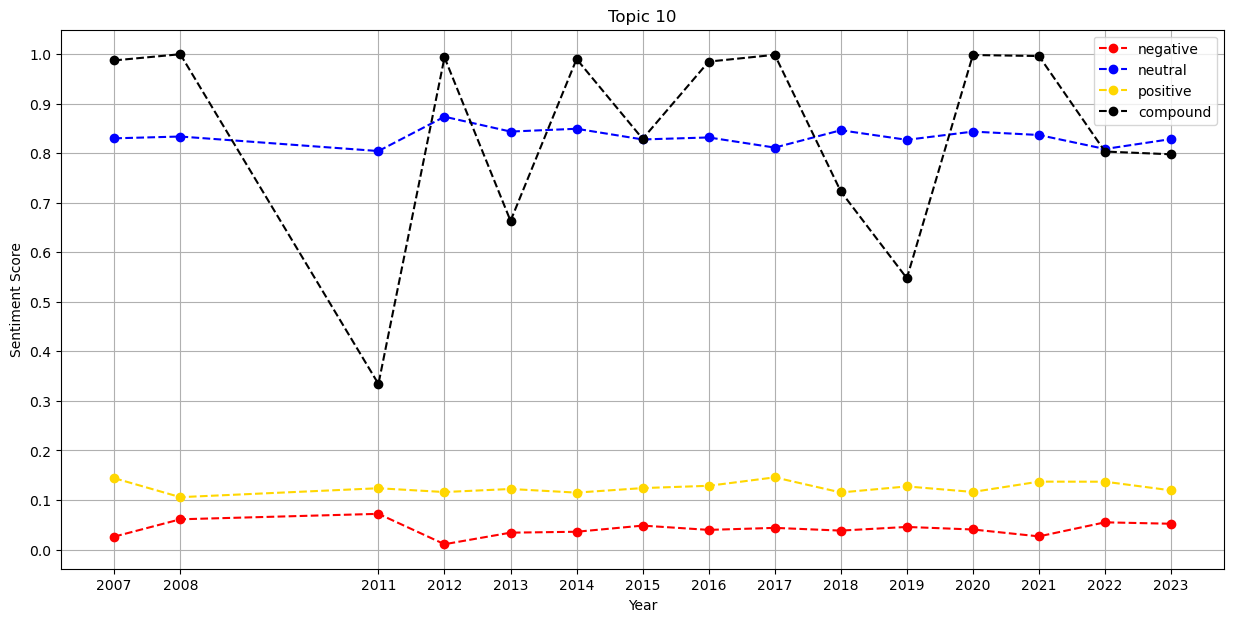

In [264]:
for topic_num, df in sorted(topic_dictionary.items()):
    title = f'Topic {topic_num + 1}'
    
    # aggregate data by year
    df = df.groupby('year')
    
    # keep year and sentiment columns, and calculate mean
    df = df[['negative', 'neutral', 'positive', 'compound']].agg(np.mean).reset_index()
    
    # .mean().reset_index()
    display(df)
    plot_sentiment(df, title)
